<a href="https://colab.research.google.com/github/NabilahSharfina/CELERATES-ACCELERATION-PROGRAM/blob/main/Final_Project_Credit_Risk_Week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center><bold>FINAL PROJECT</bold></center><h1>
<h1><center><bold>BIG DATA AND BUSINESS INTELLIGENCE</bold></center><h1>
<h1><center><bold>KAMPUS MERDEKA</bold></center><h1>
<h2><center><bold>CREDIT RISK ANALYSIS</bold></center><h2>

---



# **WEEK 2 - PREDICT DATA & MODELLING**

## Connect Google Drive

In [1]:
# Load data from google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import Library

In [2]:
import math
from collections import Counter
from pprint import pprint

import pandas as pd # for handling and cleaning the dataset
import numpy as np # for performing mathematical calculations behind ML algorithms
import matplotlib.pyplot as plt # for visualization
import seaborn as sns # for visualization

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

## 2.1 EDA

In [3]:
df = pd.read_csv('/content/drive/MyDrive/KAMPUS MERDEKA /Celerates Acceleration Program /FINAL PROJECT/Dataset/Demo/credit_risk.csv')
df

,Unnamed: 0,Id_customer,JenisKelamin,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagMobile,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Pengalaman,KategoriUsia,CreditStatus
0,0,5008808,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,1,0,1,1,1,8,lansia,0
1,1,5008809,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,1,0,1,1,1,8,lansia,0
2,2,5008810,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,1,0,1,1,1,8,lansia,0
3,3,5008811,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,1,0,1,1,1,8,lansia,0
4,4,5008812,Perempuan,Tidak,Ya,0,283500.0,Pensioner,Post Graduate,Cerai,Rumah Pribadi,1,0,0,0,1,1001,lansia,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36252,36252,5149158,Laki-laki,Ya,Ya,0,247500.0,Bekerja,Graduate,Menikah,Rumah Pribadi,1,1,0,0,2,10,dewasa,1
36253,36253,5149190,Laki-laki,Ya,Tidak,1,450000.0,Bekerja,Post Graduate,Menikah,Rumah Pribadi,1,0,1,1,3,1,dewasa,1
36254,36254,5149729,Laki-laki,Ya,Ya,0,90000.0,Bekerja,Graduate,Menikah,Rumah Pribadi,1,0,0,0,2,5,lansia,1
36255,36255,5149828,Laki-laki,Ya,Ya,0,315000.0,Bekerja,Graduate,Menikah,Rumah Pribadi,1,0,0,0,2,7,lansia,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36257 entries, 0 to 36256
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           36257 non-null  int64  
 1   Id_customer          36257 non-null  int64  
 2   JenisKelamin         36257 non-null  object 
 3   KepemilikanMobil     36257 non-null  object 
 4   KepemilikanProperti  36257 non-null  object 
 5   JmlAnak              36257 non-null  int64  
 6   Pendapatan           36257 non-null  float64
 7   TipePendapatan       36257 non-null  object 
 8   TingkatPendidikan    36257 non-null  object 
 9   StatusKeluarga       36257 non-null  object 
 10  TipeRumah            36257 non-null  object 
 11  FlagMobile           36257 non-null  int64  
 12  FlagWorkPhone        36257 non-null  int64  
 13  FlagPhone            36257 non-null  int64  
 14  Email                36257 non-null  int64  
 15  JmlAnggotaKeluarga   36257 non-null 

In [5]:
df.dtypes.value_counts()

int64      10
object      8
float64     1
dtype: int64

### 2.1.1 Missing Value

In [6]:
# Melihat apakah ada missing value dari dataset
df.isna().sum()

Unnamed: 0             0
Id_customer            0
JenisKelamin           0
KepemilikanMobil       0
KepemilikanProperti    0
JmlAnak                0
Pendapatan             0
TipePendapatan         0
TingkatPendidikan      0
StatusKeluarga         0
TipeRumah              0
FlagMobile             0
FlagWorkPhone          0
FlagPhone              0
Email                  0
JmlAnggotaKeluarga     0
Pengalaman             0
KategoriUsia           0
CreditStatus           0
dtype: int64

### 2.1.2 Unique Value

In [7]:
# Melihat data unique dari setiap fitur dalam tabel
for feature in df.columns:
    print(
        f"- Jumlah unique value pada kolom `{feature}`:",
        df[feature].nunique()
    )

- Jumlah unique value pada kolom `Unnamed: 0`: 36257
- Jumlah unique value pada kolom `Id_customer`: 36257
- Jumlah unique value pada kolom `JenisKelamin`: 2
- Jumlah unique value pada kolom `KepemilikanMobil`: 2
- Jumlah unique value pada kolom `KepemilikanProperti`: 2
- Jumlah unique value pada kolom `JmlAnak`: 9
- Jumlah unique value pada kolom `Pendapatan`: 265
- Jumlah unique value pada kolom `TipePendapatan`: 5
- Jumlah unique value pada kolom `TingkatPendidikan`: 3
- Jumlah unique value pada kolom `StatusKeluarga`: 3
- Jumlah unique value pada kolom `TipeRumah`: 5
- Jumlah unique value pada kolom `FlagMobile`: 1
- Jumlah unique value pada kolom `FlagWorkPhone`: 2
- Jumlah unique value pada kolom `FlagPhone`: 2
- Jumlah unique value pada kolom `Email`: 2
- Jumlah unique value pada kolom `JmlAnggotaKeluarga`: 10
- Jumlah unique value pada kolom `Pengalaman`: 45
- Jumlah unique value pada kolom `KategoriUsia`: 4
- Jumlah unique value pada kolom `CreditStatus`: 2


### 2.1.3 Duplicate Data

In [8]:
# Mengecek baris yang duplikat
df[df['Id_customer'].duplicated()]

,Unnamed: 0,Id_customer,JenisKelamin,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagMobile,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Pengalaman,KategoriUsia,CreditStatus


### 2.1.4 Data Cleaning

In [9]:
# Menghapus kolom yang tidak digunakan
df = df.drop(columns=['Unnamed: 0', 'Id_customer', 'FlagMobile'])
df

,JenisKelamin,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Pengalaman,KategoriUsia,CreditStatus
0,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,0,1,1,1,8,lansia,0
1,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,0,1,1,1,8,lansia,0
2,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,0,1,1,1,8,lansia,0
3,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,0,1,1,1,8,lansia,0
4,Perempuan,Tidak,Ya,0,283500.0,Pensioner,Post Graduate,Cerai,Rumah Pribadi,0,0,0,1,1001,lansia,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36252,Laki-laki,Ya,Ya,0,247500.0,Bekerja,Graduate,Menikah,Rumah Pribadi,1,0,0,2,10,dewasa,1
36253,Laki-laki,Ya,Tidak,1,450000.0,Bekerja,Post Graduate,Menikah,Rumah Pribadi,0,1,1,3,1,dewasa,1
36254,Laki-laki,Ya,Ya,0,90000.0,Bekerja,Graduate,Menikah,Rumah Pribadi,0,0,0,2,5,lansia,1
36255,Laki-laki,Ya,Ya,0,315000.0,Bekerja,Graduate,Menikah,Rumah Pribadi,0,0,0,2,7,lansia,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36257 entries, 0 to 36256
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   JenisKelamin         36257 non-null  object 
 1   KepemilikanMobil     36257 non-null  object 
 2   KepemilikanProperti  36257 non-null  object 
 3   JmlAnak              36257 non-null  int64  
 4   Pendapatan           36257 non-null  float64
 5   TipePendapatan       36257 non-null  object 
 6   TingkatPendidikan    36257 non-null  object 
 7   StatusKeluarga       36257 non-null  object 
 8   TipeRumah            36257 non-null  object 
 9   FlagWorkPhone        36257 non-null  int64  
 10  FlagPhone            36257 non-null  int64  
 11  Email                36257 non-null  int64  
 12  JmlAnggotaKeluarga   36257 non-null  int64  
 13  Pengalaman           36257 non-null  int64  
 14  KategoriUsia         36257 non-null  object 
 15  CreditStatus         36257 non-null 

### 2.1.5 Feature Category

In [11]:
# Mengetahui kolom apa saja yang termasuk fitur (variabel) numerik/kategoris
numerical_features = df.select_dtypes(include="number").columns.tolist()
categorical_features = df.select_dtypes(include="object").columns.tolist()

print("Numerical features:")
pprint(numerical_features)
print("\nCategorical features:")
pprint(categorical_features, compact=True)

Numerical features:
['JmlAnak',
 'Pendapatan',
 'FlagWorkPhone',
 'FlagPhone',
 'Email',
 'JmlAnggotaKeluarga',
 'Pengalaman',
 'CreditStatus']

Categorical features:
['JenisKelamin', 'KepemilikanMobil', 'KepemilikanProperti', 'TipePendapatan',
 'TingkatPendidikan', 'StatusKeluarga', 'TipeRumah', 'KategoriUsia']


### 2.1.6 Statistic Summary

In [12]:
# Memahami karakteristik data melalui fitur-fitur numerik dengan function describe(). T=Transpose
df[numerical_features].describe().T

,count,mean,std,min,25%,50%,75%,max
JmlAnak,36257.0,0.430427,0.742474,0.0,0.0,0.0,1.0,19.0
Pendapatan,36257.0,186625.534421,101548.649430,27000.0,121500.0,157500.0,225000.0,1575000.0
FlagWorkPhone,36257.0,0.225529,0.417936,0.0,0.0,0.0,0.0,1.0
FlagPhone,36257.0,0.294812,0.455965,0.0,0.0,0.0,1.0,1.0
Email,36257.0,0.089859,0.285983,0.0,0.0,0.0,0.0,1.0
JmlAnggotaKeluarga,36257.0,2.198720,0.911781,1.0,2.0,2.0,3.0,20.0
Pengalaman,36257.0,174.416058,371.770973,0.0,3.0,7.0,16.0,1001.0
CreditStatus,36257.0,0.116226,0.320500,0.0,0.0,0.0,0.0,1.0


In [13]:
# Memahami karakteristik data melalui fitur-fitur kategoris dengan function describe()
df[categorical_features].describe().T

,count,unique,top,freq
JenisKelamin,36257,2,Perempuan,24279
KepemilikanMobil,36257,2,Tidak,22476
KepemilikanProperti,36257,2,Ya,24367
TipePendapatan,36257,5,Bekerja,18708
TingkatPendidikan,36257,3,Graduate,26046
StatusKeluarga,36257,3,Menikah,27845
TipeRumah,36257,5,Rumah Pribadi,32367
KategoriUsia,36257,4,dewasa,19853


### 2.1.7 Data Correlation

In [14]:
# Melihat hubungan dari fitur numerik menggunakan correlation 
df.corr()

,JmlAnak,Pendapatan,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Pengalaman,CreditStatus
JmlAnak,1.000000,0.033966,0.048033,-0.016770,0.015415,0.889197,-0.231313,0.011496
Pendapatan,0.033966,1.000000,-0.037265,0.018073,0.087229,0.024134,-0.169050,0.023706
FlagWorkPhone,0.048033,-0.037265,1.000000,0.312099,-0.035255,0.064640,-0.242498,-0.000078
FlagPhone,-0.016770,0.018073,0.312099,1.000000,0.010471,-0.004652,-0.005600,-0.006858
Email,0.015415,0.087229,-0.035255,0.010471,1.000000,0.014129,-0.087042,0.019360
JmlAnggotaKeluarga,0.889197,0.024134,0.064640,-0.004652,0.014129,1.000000,-0.223191,0.009117
Pengalaman,-0.231313,-0.169050,-0.242498,-0.005600,-0.087042,-0.223191,1.000000,-0.022593
CreditStatus,0.011496,0.023706,-0.000078,-0.006858,0.019360,0.009117,-0.022593,1.000000


> Untuk lebih jelas dalam mengetahui pasangan fitur mana yang memiliki koefisien korelasi yang kuat (mendekati 1 atau mendekati -1), kita bisa buat plot heatmap berikut.

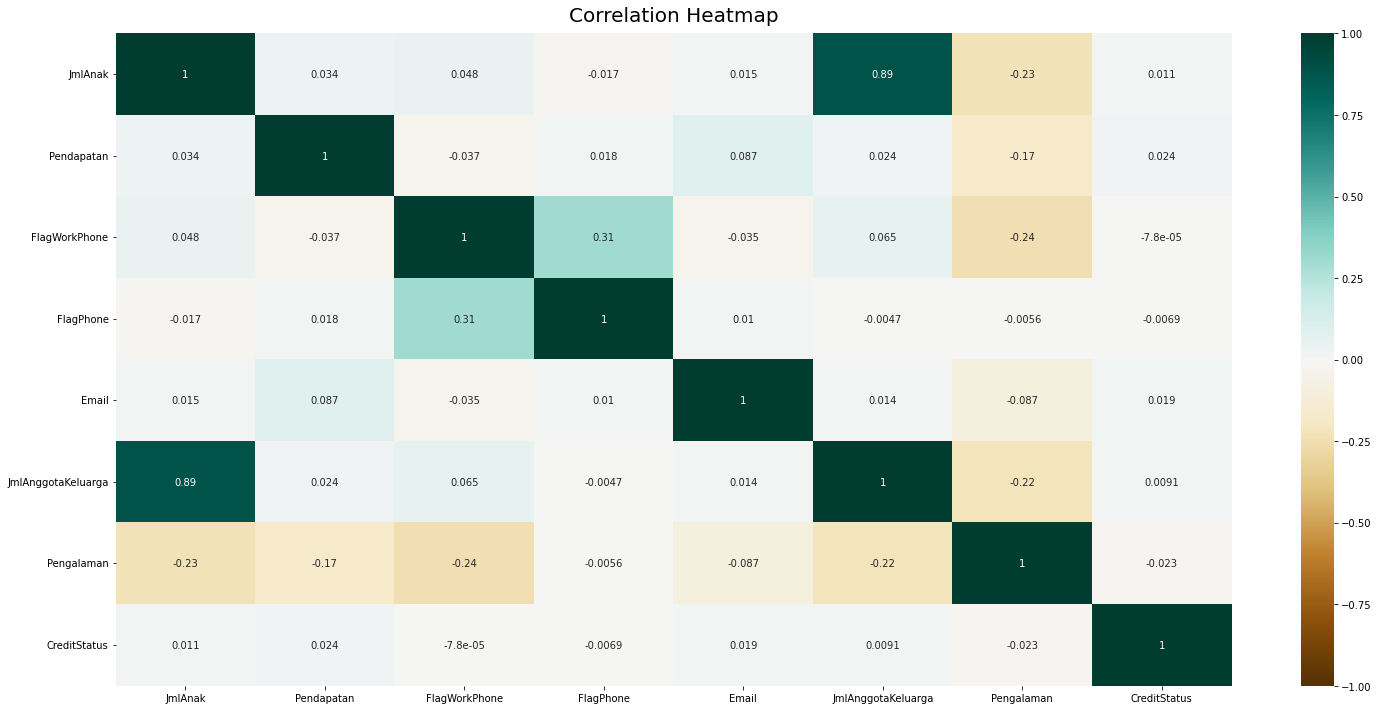

In [15]:
plt.figure(figsize=(25, 12))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=12);

### 2.1.8 Handling Outlier

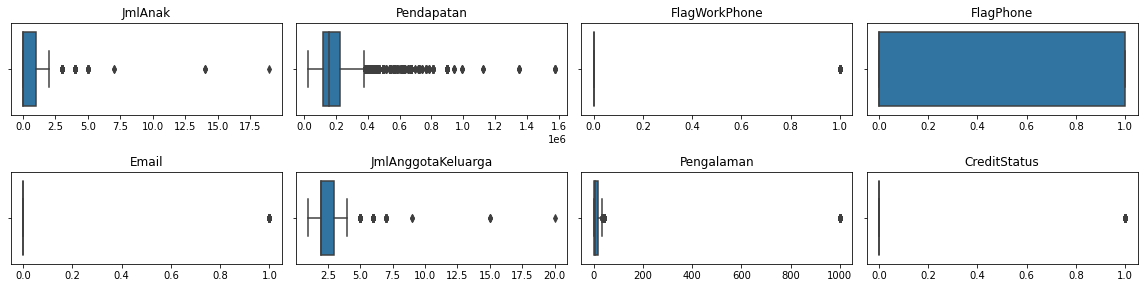

In [16]:
# Numerical Features
plt.figure(figsize=(16, 8), facecolor='white')
plotnumber = 1
    
for feature in numerical_features:
    ax = plt.subplot(4,4, plotnumber)
    sns.boxplot(x=feature, data=df);
    plt.title(feature, fontsize=12)
    plt.xlabel(None)
    plt.tight_layout()
    plotnumber += 1

> Ada beberapa cara untuk menghilangkan outliers.
* Mengganti nilai outliers menggunakan nilai lower bound dan upper bound.
* Capping menggunakan nilai median
* Capping menggunakan nilai mean
* Capping menggunakan nilai modus

> **Referensi:** [handling outlier](https://blog.sanbercode.com/docs/materi-eda/data-type-missing-value-outlier/)

In [17]:
# Membuat function IQR Detection
def outlier(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr * 1.5
    print(f'IQR: {iqr}')
    upperlimit = q3 + limit
    lowerlimit = q1 - limit
    print(f'Upper Limit: {upperlimit}')
    print(f'Lower Limit: {lowerlimit}')

# Buang Outlier
outlier_feature = [
                    'JmlAnak', 
                    'Pendapatan',
                    'JmlAnggotaKeluarga', 
                    'Pengalaman'
                    ]

for i in outlier_feature:
    print(i)
    outlier(df[i])
    print()

df = df[
        (df['JmlAnak'] < 2.5) & 
        (df['Pendapatan'] < 380250.0) & 
        (df['JmlAnggotaKeluarga'] < 4.5) & 
        (df['Pengalaman'] < 35.5)
        ]

JmlAnak
IQR: 1.0
Upper Limit: 2.5
Lower Limit: -1.5

Pendapatan
IQR: 103500.0
Upper Limit: 380250.0
Lower Limit: -33750.0

JmlAnggotaKeluarga
IQR: 1.0
Upper Limit: 4.5
Lower Limit: 0.5

Pengalaman
IQR: 13.0
Upper Limit: 35.5
Lower Limit: -16.5



In [18]:
# Clean dataframe from outlier
credit_risk_df = df.drop_duplicates()
credit_risk_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8562 entries, 0 to 36256
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   JenisKelamin         8562 non-null   object 
 1   KepemilikanMobil     8562 non-null   object 
 2   KepemilikanProperti  8562 non-null   object 
 3   JmlAnak              8562 non-null   int64  
 4   Pendapatan           8562 non-null   float64
 5   TipePendapatan       8562 non-null   object 
 6   TingkatPendidikan    8562 non-null   object 
 7   StatusKeluarga       8562 non-null   object 
 8   TipeRumah            8562 non-null   object 
 9   FlagWorkPhone        8562 non-null   int64  
 10  FlagPhone            8562 non-null   int64  
 11  Email                8562 non-null   int64  
 12  JmlAnggotaKeluarga   8562 non-null   int64  
 13  Pengalaman           8562 non-null   int64  
 14  KategoriUsia         8562 non-null   object 
 15  CreditStatus         8562 non-null   

In [19]:
credit_risk_df.value_counts('CreditStatus')

CreditStatus
0    6705
1    1857
dtype: int64

### 2.1.9 Visualization

In [20]:
# Visualisasi kolom status untuk melihat jumlah data
def plot_count(data, x=None, y=None, palette=None, figsize=(12, 4), **kwargs):
    column_order = data[x or y].value_counts().index

    plt.figure(figsize=figsize)
    sns.countplot(
        x=x, y=y, data=data, order=column_order,
        palette=palette, **kwargs
    )
    plt.grid(False)

MAIN_COLOR = ["#29B5BF"] 
OTHER_COLOR = ["#777777"]

#### 2.1.9.1 Jenis Kelamin

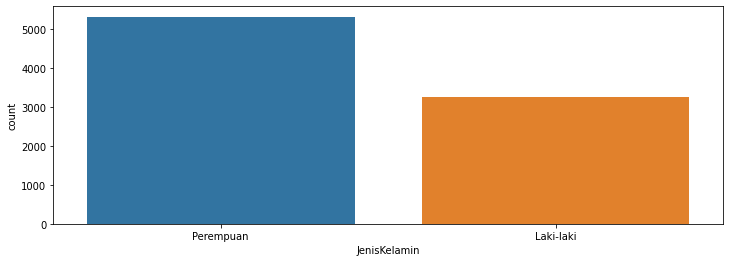

In [21]:
# Show visualization 'JenisKelamin'
plot_count(x="JenisKelamin", data=credit_risk_df)

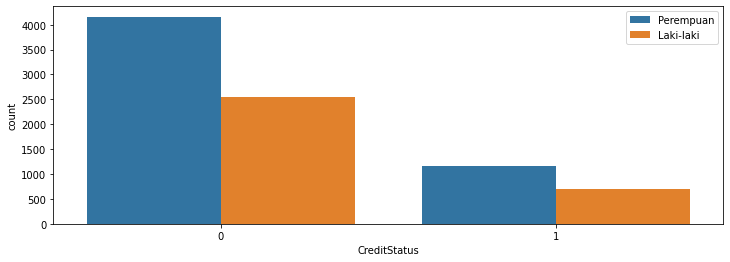

In [22]:
# Show visualization 'CreditStatus' terhadap 'JenisKelamin'
plot_count(x="CreditStatus", hue="JenisKelamin", data=credit_risk_df, figsize=(12, 4))
plt.legend(loc="upper right")
plt.show()

#### 2.1.9.2 Kepemilikan

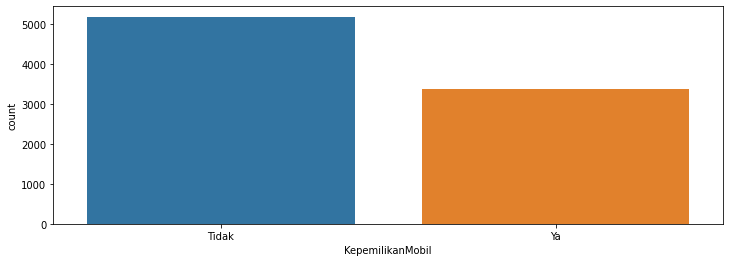

In [23]:
# Show visualization 'KepemilikanMobil'
plot_count(x="KepemilikanMobil", data=credit_risk_df)

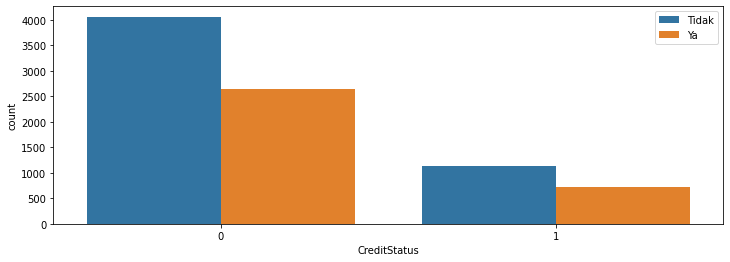

In [24]:
# Show visualization 'CreditStatus' terhadap 'KepemilikanMobil'
plot_count(x="CreditStatus", hue="KepemilikanMobil", data=credit_risk_df, figsize=(12, 4))
plt.legend(loc="upper right")
plt.show()

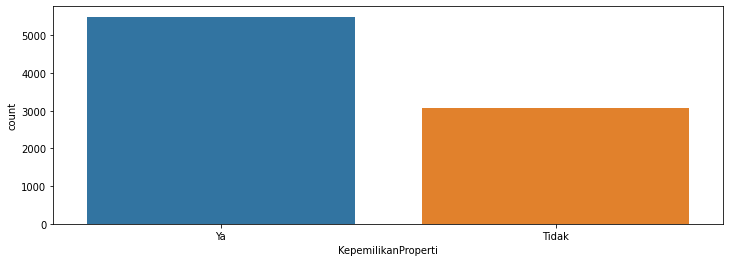

In [25]:
# Show visualization 'KepemilikanProperti'
plot_count(x="KepemilikanProperti", data=credit_risk_df)

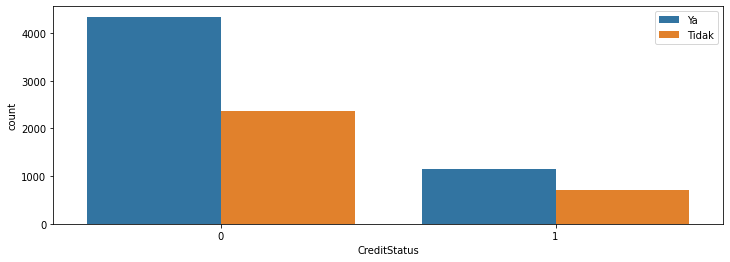

In [26]:
# Show visualization 'CreditStatus' terhadap 'KepemilikanProperti'
plot_count(x="CreditStatus", hue="KepemilikanProperti", data=credit_risk_df, figsize=(12, 4))
plt.legend(loc="upper right")
plt.show()

#### 2.1.9.3 Credit Status

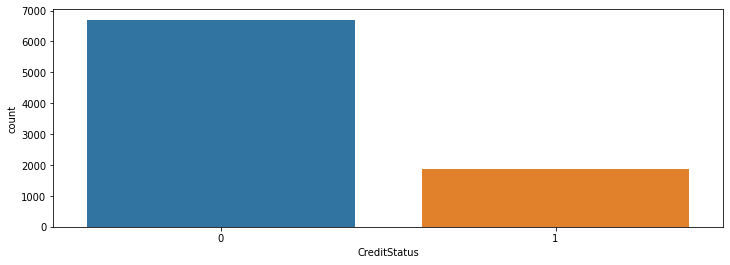

In [27]:
# Show visualization 'CreditStatus'
plot_count(x="CreditStatus", data=credit_risk_df)

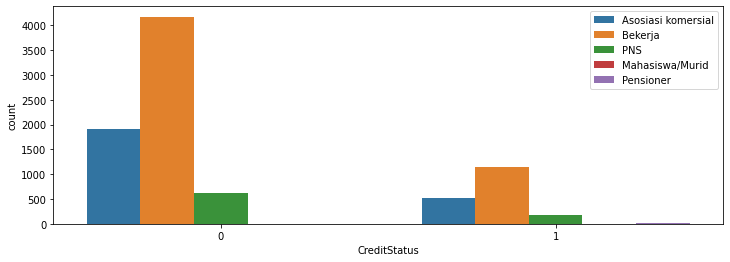

In [28]:
# Show visualization 'CreditStatus' terhadap 'TipePendapatan'
plot_count(x="CreditStatus", hue="TipePendapatan", data=credit_risk_df, figsize=(12, 4))
plt.legend(loc="upper right")
plt.show()

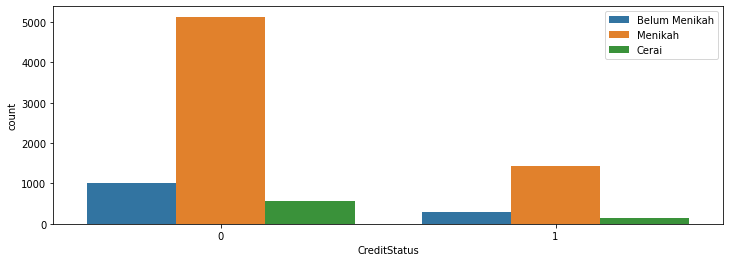

In [29]:
# Show visualization 'CreditStatus' terhadap 'StatusKeluarga'
plot_count(x="CreditStatus", hue="StatusKeluarga", data=credit_risk_df, figsize=(12, 4))
plt.legend(loc="upper right")
plt.show()

#### 2.1.9.4 Kategori Usia

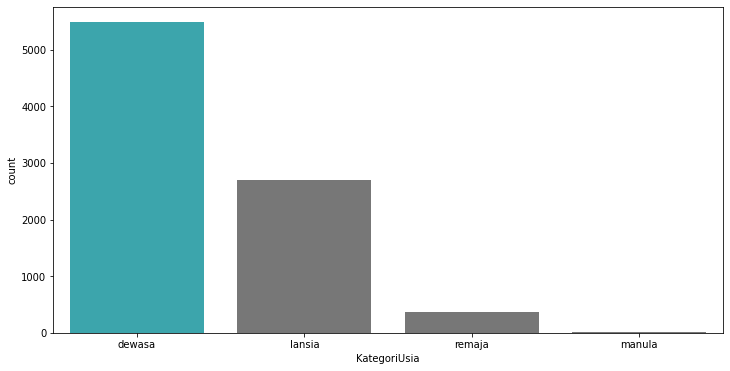

In [30]:
age_category = credit_risk_df.KategoriUsia.value_counts().index

plt.figure(figsize=(12, 6))
sns.countplot(
    x="KategoriUsia",
    data=credit_risk_df,
    order=age_category,
    palette=["#29B5BF"] + (len(age_category)-1)*["#777777"]
)
plt.grid(False)

plt.show()

> **Insights:** 

> * Dari visualisasi di atas, terlihat bahwa mayoritas adalah kategori **Dewasa**.
> * Lalu, bagaimana distribusi kategori umur pada masing-masing responden yang memiliki sakit jantung maupun tidak? Mari kita buat visualisasinya.

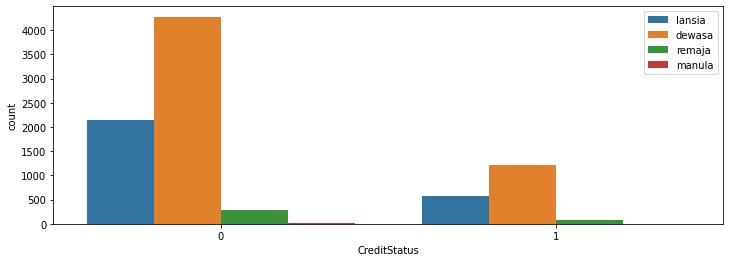

In [31]:
# Show visualization 'CreditStatus' terhadap 'KategoriUsia'
plot_count(x="CreditStatus", hue="KategoriUsia", data=credit_risk_df, figsize=(12, 4))
plt.legend(loc="upper right")
plt.show()

## 2.2 Modelling

In [32]:
credit_risk_df.head()

,JenisKelamin,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Pengalaman,KategoriUsia,CreditStatus
0,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,0,1,1,1,8,lansia,0
7,Perempuan,Ya,Tidak,0,130500.0,Bekerja,Graduate,Menikah,Rumah Pribadi,0,0,0,2,3,dewasa,1
9,Perempuan,Tidak,Ya,0,157500.0,Bekerja,Graduate,Menikah,Rumah Pribadi,0,1,0,2,4,dewasa,1
12,Perempuan,Tidak,Ya,1,112500.0,Bekerja,Graduate,Belum Menikah,Rumah Pribadi,0,0,0,2,4,dewasa,0
14,Perempuan,Ya,Ya,2,135000.0,Bekerja,Graduate,Menikah,Rumah Pribadi,0,0,0,4,9,dewasa,0


In [33]:
# Melihat isi data dari setiap kolom
for feature in df.columns:
    print(
        f"- Rows value pada kolom `{feature}`:",
        credit_risk_df[feature].unique()
    )

- Rows value pada kolom `JenisKelamin`: ['Perempuan' 'Laki-laki']
- Rows value pada kolom `KepemilikanMobil`: ['Tidak' 'Ya']
- Rows value pada kolom `KepemilikanProperti`: ['Ya' 'Tidak']
- Rows value pada kolom `JmlAnak`: [0 1 2]
- Rows value pada kolom `Pendapatan`: [270000.  130500.  157500.  112500.  135000.  211500.  126000.  247500.
 297000.  216000.  225000.  315000.  148500.  202500.  180000.  292500.
  74250.  144000.  193500.  139500.   76500.   67500.   90000.   81000.
 198000.   45000.  238500.   99000.  360000.  279000.  306000.  189000.
 328500.  310500.  171000.  121500.   72000.  184500.   94500.  256500.
 166500.  196650.   40500.  243000.  162000.  103500.  257625.   58500.
 207000.   54000.  234000.  117000.  261000.  175500.  337500.  119250.
  63000.  274500.   85500.  108000.  145350.  173250.   36000.  118350.
 153000.  123750.  252000.  220500.  133650.  265500.  227250.   51750.
  69750.  288000.  234135.   74061.  175950.  364500.  240750.  333000.
 342000.  11

### 2.2.1 Categorical Encoding

> **Note:** Jenis-Jenis Tipe Data
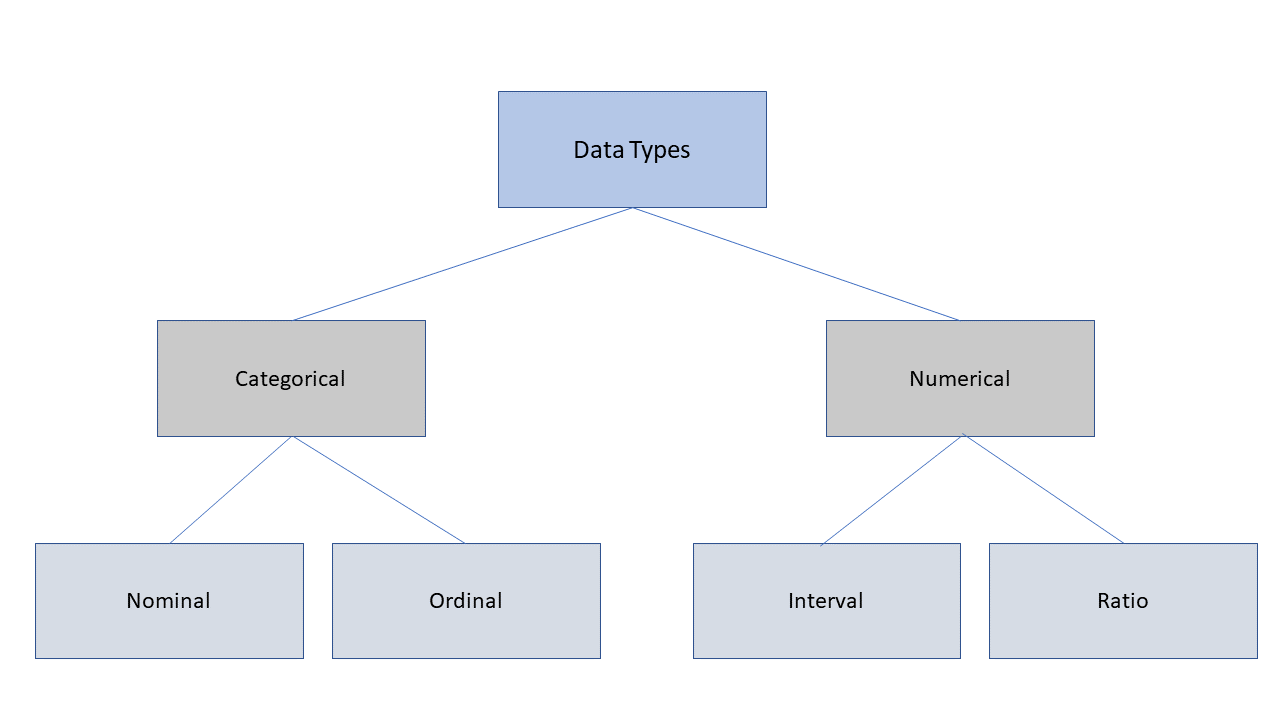

> Dilihat dari isi value masing-masing fitur, maka encoding akan terbagi menjadi 2 yaitu: 
> 1. ***Label Encoding*** untuk fitur kategorik tipe data ordinal seperti `TingkatPendidikan`, `StatusKeluarga`, `KategoriUsia` 
> 2. ***One Hot Encoding*** untuk fitur kategorik tipe data nominal, interval, dan rasio (sisa fitur kategorik lainnya, selain ordinal).

#### 2.2.1.1 Label Encoding

In [34]:
# Label Encoding: digunakan untuk tipe data ordinal
from sklearn.preprocessing import LabelEncoder

# Creating instance of labelencoder
labelencoder = LabelEncoder()

# Creating initial
cols = [
        'TingkatPendidikan',  
        'StatusKeluarga',
        'KategoriUsia'
        ]

# Assigning numerical values and storing in another column
for col_le in cols:
    credit_risk_df[col_le] = labelencoder.fit_transform(credit_risk_df[col_le])

<ipython-input-34-2f927717121f>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_risk_df[col_le] = labelencoder.fit_transform(credit_risk_df[col_le])


In [35]:
label_encoding_df = pd.DataFrame(credit_risk_df)
label_encoding_df.head()

,JenisKelamin,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Pengalaman,KategoriUsia,CreditStatus
0,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,0,0,Rumah Pribadi,0,1,1,1,8,1,0
7,Perempuan,Ya,Tidak,0,130500.0,Bekerja,0,2,Rumah Pribadi,0,0,0,2,3,0,1
9,Perempuan,Tidak,Ya,0,157500.0,Bekerja,0,2,Rumah Pribadi,0,1,0,2,4,0,1
12,Perempuan,Tidak,Ya,1,112500.0,Bekerja,0,0,Rumah Pribadi,0,0,0,2,4,0,0
14,Perempuan,Ya,Ya,2,135000.0,Bekerja,0,2,Rumah Pribadi,0,0,0,4,9,0,0


In [36]:
label_encoding_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8562 entries, 0 to 36256
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   JenisKelamin         8562 non-null   object 
 1   KepemilikanMobil     8562 non-null   object 
 2   KepemilikanProperti  8562 non-null   object 
 3   JmlAnak              8562 non-null   int64  
 4   Pendapatan           8562 non-null   float64
 5   TipePendapatan       8562 non-null   object 
 6   TingkatPendidikan    8562 non-null   int64  
 7   StatusKeluarga       8562 non-null   int64  
 8   TipeRumah            8562 non-null   object 
 9   FlagWorkPhone        8562 non-null   int64  
 10  FlagPhone            8562 non-null   int64  
 11  Email                8562 non-null   int64  
 12  JmlAnggotaKeluarga   8562 non-null   int64  
 13  Pengalaman           8562 non-null   int64  
 14  KategoriUsia         8562 non-null   int64  
 15  CreditStatus         8562 non-null   

#### 2.2.1.2 One Hot Encoding

##### a. Cara 1 - with Scikit Learn


In [37]:
# One Hot Encoding: digunakan untuk bukan tipe data ordinal, misal nominal, interval, dan ratio
from sklearn.preprocessing import OneHotEncoder

cat_cols = credit_risk_df.select_dtypes('category').columns
encoder = OneHotEncoder(drop='first', sparse=False)
encoder.fit(credit_risk_df[cat_cols])

OneHotEncoder(drop='first', sparse=False)

In [38]:
x_dummy = pd.DataFrame(encoder.transform(credit_risk_df[cat_cols]), index=credit_risk_df.index, columns=encoder.get_feature_names(credit_risk_df[cat_cols].columns))
x_dummy.head()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


""
0
7
9
12
14


In [39]:
x_dummy = pd.concat([credit_risk_df.select_dtypes(exclude='category'), x_dummy], axis=1)
x_dummy.head()

,JenisKelamin,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Pengalaman,KategoriUsia,CreditStatus
0,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,0,0,Rumah Pribadi,0,1,1,1,8,1,0
7,Perempuan,Ya,Tidak,0,130500.0,Bekerja,0,2,Rumah Pribadi,0,0,0,2,3,0,1
9,Perempuan,Tidak,Ya,0,157500.0,Bekerja,0,2,Rumah Pribadi,0,1,0,2,4,0,1
12,Perempuan,Tidak,Ya,1,112500.0,Bekerja,0,0,Rumah Pribadi,0,0,0,2,4,0,0
14,Perempuan,Ya,Ya,2,135000.0,Bekerja,0,2,Rumah Pribadi,0,0,0,4,9,0,0


In [40]:
x_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8562 entries, 0 to 36256
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   JenisKelamin         8562 non-null   object 
 1   KepemilikanMobil     8562 non-null   object 
 2   KepemilikanProperti  8562 non-null   object 
 3   JmlAnak              8562 non-null   int64  
 4   Pendapatan           8562 non-null   float64
 5   TipePendapatan       8562 non-null   object 
 6   TingkatPendidikan    8562 non-null   int64  
 7   StatusKeluarga       8562 non-null   int64  
 8   TipeRumah            8562 non-null   object 
 9   FlagWorkPhone        8562 non-null   int64  
 10  FlagPhone            8562 non-null   int64  
 11  Email                8562 non-null   int64  
 12  JmlAnggotaKeluarga   8562 non-null   int64  
 13  Pengalaman           8562 non-null   int64  
 14  KategoriUsia         8562 non-null   int64  
 15  CreditStatus         8562 non-null   

##### b. Cara 2 - with Pandas

In [41]:
one_hot_encoded_df = pd.get_dummies(credit_risk_df, columns = ['JenisKelamin', 'KepemilikanMobil', 'KepemilikanProperti', 'TipePendapatan', 'TipeRumah'])
one_hot_encoded_df.head()

,JmlAnak,Pendapatan,TingkatPendidikan,StatusKeluarga,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Pengalaman,KategoriUsia,...,TipePendapatan_Asosiasi komersial,TipePendapatan_Bekerja,TipePendapatan_Mahasiswa/Murid,TipePendapatan_PNS,TipePendapatan_Pensioner,TipeRumah_Apartment Kantor,TipeRumah_Apartment Pribadi,TipeRumah_Rumah Orang Tua,TipeRumah_Rumah Pribadi,TipeRumah_Sewa Apartment
0,0,270000.0,0,0,0,1,1,1,8,1,...,1,0,0,0,0,0,0,0,1,0
7,0,130500.0,0,2,0,0,0,2,3,0,...,0,1,0,0,0,0,0,0,1,0
9,0,157500.0,0,2,0,1,0,2,4,0,...,0,1,0,0,0,0,0,0,1,0
12,1,112500.0,0,0,0,0,0,2,4,0,...,0,1,0,0,0,0,0,0,1,0
14,2,135000.0,0,2,0,0,0,4,9,0,...,0,1,0,0,0,0,0,0,1,0


In [42]:
one_hot_encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8562 entries, 0 to 36256
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   JmlAnak                            8562 non-null   int64  
 1   Pendapatan                         8562 non-null   float64
 2   TingkatPendidikan                  8562 non-null   int64  
 3   StatusKeluarga                     8562 non-null   int64  
 4   FlagWorkPhone                      8562 non-null   int64  
 5   FlagPhone                          8562 non-null   int64  
 6   Email                              8562 non-null   int64  
 7   JmlAnggotaKeluarga                 8562 non-null   int64  
 8   Pengalaman                         8562 non-null   int64  
 9   KategoriUsia                       8562 non-null   int64  
 10  CreditStatus                       8562 non-null   int64  
 11  JenisKelamin_Laki-laki             8562 non-null   uint

### 2.2.2 Normalization

##### 2.2.2.1 Cara 1 - with Scikit Learn

In [43]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
min_max_scaled = pd.DataFrame(mms.fit_transform(one_hot_encoded_df), columns=one_hot_encoded_df.columns).set_index(one_hot_encoded_df.index)
min_max_scaled.head()

,JmlAnak,Pendapatan,TingkatPendidikan,StatusKeluarga,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Pengalaman,KategoriUsia,...,TipePendapatan_Asosiasi komersial,TipePendapatan_Bekerja,TipePendapatan_Mahasiswa/Murid,TipePendapatan_PNS,TipePendapatan_Pensioner,TipeRumah_Apartment Kantor,TipeRumah_Apartment Pribadi,TipeRumah_Rumah Orang Tua,TipeRumah_Rumah Pribadi,TipeRumah_Sewa Apartment
0,0.0,0.692308,0.0,0.0,0.0,1.0,1.0,0.000000,0.228571,0.333333,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.0,0.294872,0.0,1.0,0.0,0.0,0.0,0.333333,0.085714,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.0,0.371795,0.0,1.0,0.0,1.0,0.0,0.333333,0.114286,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12,0.5,0.243590,0.0,0.0,0.0,0.0,0.0,0.333333,0.114286,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14,1.0,0.307692,0.0,1.0,0.0,0.0,0.0,1.000000,0.257143,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [44]:
min_max_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8562 entries, 0 to 36256
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   JmlAnak                            8562 non-null   float64
 1   Pendapatan                         8562 non-null   float64
 2   TingkatPendidikan                  8562 non-null   float64
 3   StatusKeluarga                     8562 non-null   float64
 4   FlagWorkPhone                      8562 non-null   float64
 5   FlagPhone                          8562 non-null   float64
 6   Email                              8562 non-null   float64
 7   JmlAnggotaKeluarga                 8562 non-null   float64
 8   Pengalaman                         8562 non-null   float64
 9   KategoriUsia                       8562 non-null   float64
 10  CreditStatus                       8562 non-null   float64
 11  JenisKelamin_Laki-laki             8562 non-null   floa

##### 2.2.2.2 Cara 2 - with Pandas

In [45]:
# copy the data
df_min_max_scaled = one_hot_encoded_df.copy()

# apply normalization techniques
for column in df_min_max_scaled.columns:
	df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())	

# view normalized data
df_min_max_scaled.head()

,JmlAnak,Pendapatan,TingkatPendidikan,StatusKeluarga,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Pengalaman,KategoriUsia,...,TipePendapatan_Asosiasi komersial,TipePendapatan_Bekerja,TipePendapatan_Mahasiswa/Murid,TipePendapatan_PNS,TipePendapatan_Pensioner,TipeRumah_Apartment Kantor,TipeRumah_Apartment Pribadi,TipeRumah_Rumah Orang Tua,TipeRumah_Rumah Pribadi,TipeRumah_Sewa Apartment
0,0.0,0.692308,0.0,0.0,0.0,1.0,1.0,0.000000,0.228571,0.333333,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.0,0.294872,0.0,1.0,0.0,0.0,0.0,0.333333,0.085714,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.0,0.371795,0.0,1.0,0.0,1.0,0.0,0.333333,0.114286,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12,0.5,0.243590,0.0,0.0,0.0,0.0,0.0,0.333333,0.114286,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14,1.0,0.307692,0.0,1.0,0.0,0.0,0.0,1.000000,0.257143,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [46]:
df_min_max_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8562 entries, 0 to 36256
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   JmlAnak                            8562 non-null   float64
 1   Pendapatan                         8562 non-null   float64
 2   TingkatPendidikan                  8562 non-null   float64
 3   StatusKeluarga                     8562 non-null   float64
 4   FlagWorkPhone                      8562 non-null   float64
 5   FlagPhone                          8562 non-null   float64
 6   Email                              8562 non-null   float64
 7   JmlAnggotaKeluarga                 8562 non-null   float64
 8   Pengalaman                         8562 non-null   float64
 9   KategoriUsia                       8562 non-null   float64
 10  CreditStatus                       8562 non-null   float64
 11  JenisKelamin_Laki-laki             8562 non-null   floa

### 2.2.3 Data Splitting

> Pada tahap ini, kita akan membagi dataset menjadi 3 set yaitu: 
> * **training**, dan
> * **testing** 

> Dengan proporsi **90% : 10%**

In [47]:
# Define variable X (Independent variable / features)
X = min_max_scaled.drop(columns=["CreditStatus"]).copy()

# Define variable y (Dependent variable / target variable)
Y = min_max_scaled["CreditStatus"].copy()

### 2.2.4 Handling Imbalance

In [48]:
# Handle imbalance dataset
from imblearn.over_sampling import SMOTE

oversampling = SMOTE(random_state=43, sampling_strategy=1)

# Fit the over sampling
X_r, Y_r = oversampling.fit_resample(X, Y)

print('Original dataset shape is ', Counter(Y))
print('Resample dataset shape is ', Counter(Y_r))

Original dataset shape is  Counter({0.0: 6705, 1.0: 1857})
Resample dataset shape is  Counter({0.0: 6705, 1.0: 6705})


In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 12)

### 2.2.5 Data Rescalling

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)


X_train.head()

,JmlAnak,Pendapatan,TingkatPendidikan,StatusKeluarga,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Pengalaman,KategoriUsia,...,TipePendapatan_Asosiasi komersial,TipePendapatan_Bekerja,TipePendapatan_Mahasiswa/Murid,TipePendapatan_PNS,TipePendapatan_Pensioner,TipeRumah_Apartment Kantor,TipeRumah_Apartment Pribadi,TipeRumah_Rumah Orang Tua,TipeRumah_Rumah Pribadi,TipeRumah_Sewa Apartment
21388,0.0,0.371795,0.0,1.0,0.0,0.0,0.0,0.333333,0.228571,0.333333,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
25970,0.0,0.397436,0.0,1.0,0.0,0.0,0.0,0.333333,0.657143,0.333333,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
28102,0.0,0.410256,0.0,0.0,1.0,1.0,0.0,0.000000,0.000000,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
25915,0.0,0.307692,0.0,1.0,1.0,1.0,0.0,0.333333,0.142857,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9515,0.0,0.564103,0.0,0.0,0.0,0.0,0.0,0.000000,0.457143,0.333333,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [51]:
X_train_scaled.head()

,JmlAnak,Pendapatan,TingkatPendidikan,StatusKeluarga,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Pengalaman,KategoriUsia,...,TipePendapatan_Asosiasi komersial,TipePendapatan_Bekerja,TipePendapatan_Mahasiswa/Murid,TipePendapatan_PNS,TipePendapatan_Pensioner,TipeRumah_Apartment Kantor,TipeRumah_Apartment Pribadi,TipeRumah_Rumah Orang Tua,TipeRumah_Rumah Pribadi,TipeRumah_Sewa Apartment
0,-0.655711,-0.261744,-0.607968,0.523999,-0.601807,-0.638827,-0.33336,-0.245825,0.183597,0.779999,...,-0.629322,0.781034,-0.020934,-0.320778,-0.038239,-0.115393,-0.188496,-0.249048,0.374393,-0.131832
1,-0.655711,-0.135876,-0.607968,0.523999,-0.601807,-0.638827,-0.33336,-0.245825,2.583315,0.779999,...,-0.629322,0.781034,-0.020934,-0.320778,-0.038239,-0.115393,-0.188496,-0.249048,0.374393,-0.131832
2,-0.655711,-0.072942,-0.607968,-2.197935,1.661662,1.565368,-0.33336,-1.412601,-1.096254,-0.627328,...,1.589013,-1.280354,-0.020934,-0.320778,-0.038239,-0.115393,-0.188496,-0.249048,0.374393,-0.131832
3,-0.655711,-0.576413,-0.607968,0.523999,1.661662,1.565368,-0.33336,-0.245825,-0.296347,-0.627328,...,1.589013,-1.280354,-0.020934,-0.320778,-0.038239,-0.115393,-0.188496,-0.249048,0.374393,-0.131832
4,-0.655711,0.682265,-0.607968,-2.197935,-0.601807,-0.638827,-0.33336,-1.412601,1.463447,0.779999,...,-0.629322,-1.280354,-0.020934,3.117420,-0.038239,-0.115393,-0.188496,-0.249048,0.374393,-0.131832


In [52]:
X_train_scaled_df = X_train_scaled.drop_duplicates()
X_train_scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6021 entries, 0 to 6848
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   JmlAnak                            6021 non-null   float64
 1   Pendapatan                         6021 non-null   float64
 2   TingkatPendidikan                  6021 non-null   float64
 3   StatusKeluarga                     6021 non-null   float64
 4   FlagWorkPhone                      6021 non-null   float64
 5   FlagPhone                          6021 non-null   float64
 6   Email                              6021 non-null   float64
 7   JmlAnggotaKeluarga                 6021 non-null   float64
 8   Pengalaman                         6021 non-null   float64
 9   KategoriUsia                       6021 non-null   float64
 10  JenisKelamin_Laki-laki             6021 non-null   float64
 11  JenisKelamin_Perempuan             6021 non-null   float

### 2.2.6 Modelling

In [53]:
# Membuat model machine learning
pipeline = []
pipeline.append(SVC())
pipeline.append(KNeighborsClassifier())
pipeline.append(DecisionTreeClassifier())

In [54]:
# Memasukkan model machine learning yang telah dibuat kedalam sebuah list
model_list = ['SVM', 'KNN', 'Decision']
acc_list = []
auc_list = []
cm_list = []
report = []

In [55]:
for model in pipeline:
  model.fit(X_r, Y_r)
  Y_pred = model.predict(X_test)
  acc_list.append(metrics.accuracy_score(Y_test, Y_pred))
  fpr, tpr, _thresholds = metrics.roc_curve(Y_test, Y_pred)
  auc_list.append(round(metrics.auc(fpr, tpr), 2))
  cm_list.append(confusion_matrix(Y_test, Y_pred))

In [56]:
# Membuat dataframe terkait informasi model
result = pd.DataFrame({'Model' : model_list,
                       'Accuracy' : acc_list,
                       'AUC' : auc_list})
result

,Model,Accuracy,AUC
0,SVM,0.508465,0.56
1,KNN,0.690018,0.73
2,Decision,0.850555,0.64


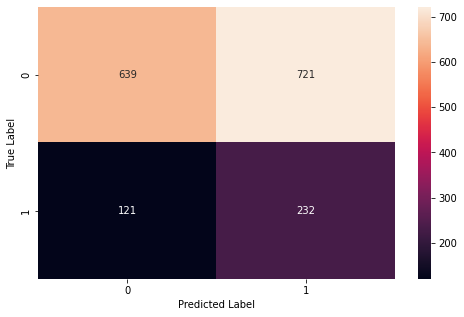

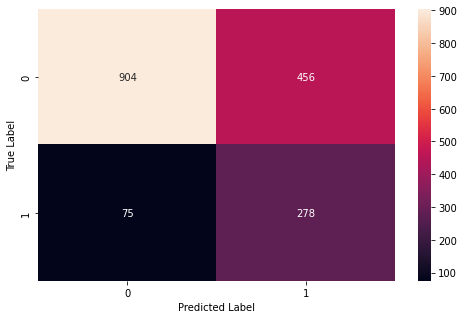

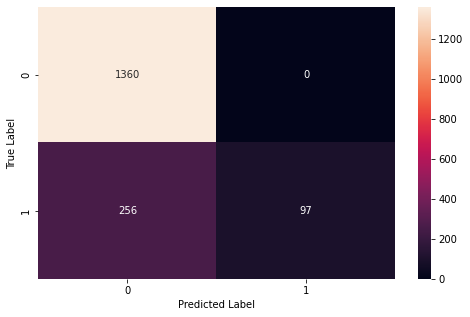

In [57]:
# Visualisasi hasil klasifikasi
for model in cm_list:
  f, ax = plt.subplots(figsize=(8,5))
  sns.heatmap(model, annot=True, fmt=".0f", ax=ax)
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.show()

### 2.2.7 Evaluation

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [59]:
# Evaluation Metrics
def classification_eval (aktual, prediksi, name):
    cm = confusion_matrix(aktual, prediksi)
    tp = cm[1][1]
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    
    accuracy = round((tp + tn) / (tp + tn + fp + fn) * 100, 2)
    precision = round((tp) / (tp + fp) * 100, 2)
    recall = round((tp) / (tp + fn) * 100, 2)
    f1_score = round((2 * (precision * recall) / (precision + recall)))
    
    print('Evaluation Model:', name)
    print(cm)
    print('Accuracy   :', accuracy, '%')
    print('Precision  :', precision, '%')
    print('Recall     :', recall, '%')
    print('F1_Score   :', f1_score, '%')

#### 2.2.7.1 KNN

In [60]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, Y_train)

KNeighborsClassifier(n_neighbors=7)

In [61]:
Y_train_pred = knn.predict(X_train_scaled)
Y_test_pred = knn.predict(X_test_scaled)

In [62]:
classification_eval(Y_train, Y_train_pred, 'KNN Training')

Evaluation Model: KNN Training
[[5280   65]
 [1403  101]]
Accuracy   : 78.57 %
Precision  : 60.84 %
Recall     : 6.72 %
F1_Score   : 12 %


In [63]:
classification_eval(Y_test, Y_test_pred, 'KNN Testing')

Evaluation Model: KNN Testing
[[1319   41]
 [ 346    7]]
Accuracy   : 77.41 %
Precision  : 14.58 %
Recall     : 1.98 %
F1_Score   : 3 %


#### 2.2.7.2 Decision Tree

In [64]:
dt = DecisionTreeClassifier(max_depth=7) # bisa cek pake gini atau pake entropy
dt.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=7)

In [65]:
Y_train_pred = dt.predict(X_train)
Y_test_pred = dt.predict(X_test)

In [66]:
classification_eval(Y_train, Y_train_pred, 'Decision Tree Training')

Evaluation Model: Decision Tree Training
[[5343    2]
 [1479   25]]
Accuracy   : 78.38 %
Precision  : 92.59 %
Recall     : 1.66 %
F1_Score   : 3 %


In [67]:
classification_eval(Y_test, Y_test_pred, 'Decision Tree Testing')

Evaluation Model: Decision Tree Testing
[[1355    5]
 [ 351    2]]
Accuracy   : 79.22 %
Precision  : 28.57 %
Recall     : 0.57 %
F1_Score   : 1 %


#### 2.2.7.3 Random Forest

In [68]:
rf = RandomForestClassifier(max_depth=7)
rf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=7)

In [69]:
Y_train_pred = rf.predict(X_train)
Y_test_pred = rf.predict(X_test)

In [70]:
classification_eval(Y_train, Y_train_pred, 'Random Forest Training')

Evaluation Model: Random Forest Training
[[5345    0]
 [1494   10]]
Accuracy   : 78.19 %
Precision  : 100.0 %
Recall     : 0.66 %
F1_Score   : 1 %


In [71]:
classification_eval(Y_test, Y_test_pred, 'Random Forest testing')

Evaluation Model: Random Forest testing
[[1360    0]
 [ 351    2]]
Accuracy   : 79.51 %
Precision  : 100.0 %
Recall     : 0.57 %
F1_Score   : 1 %


#### 2.2.7.4 XGBoost

In [72]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, classification_report

# Fit model no training data
model_xgb = XGBClassifier()

model_xgb.fit(X_train, Y_train)

# Make predictions for test data
y_pred = model_xgb.predict(X_test)
predictions = [round(value) for value in y_pred]

# Evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 79.51%


#### 2.2.7.5 CatBoost

In [74]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 27 kB/s 


In [75]:
import catboost as ctb

model_cbc = ctb.CatBoostClassifier()
model_cbc.fit(X_train, Y_train)
print(model_cbc)

Learning rate set to 0.023429
0:	learn: 0.6848836	total: 56.7ms	remaining: 56.6s
1:	learn: 0.6768923	total: 65.2ms	remaining: 32.5s
2:	learn: 0.6692838	total: 80.2ms	remaining: 26.7s
3:	learn: 0.6620600	total: 86.2ms	remaining: 21.5s
4:	learn: 0.6552301	total: 94.6ms	remaining: 18.8s
5:	learn: 0.6488201	total: 102ms	remaining: 16.8s
6:	learn: 0.6425688	total: 113ms	remaining: 16s
7:	learn: 0.6366705	total: 118ms	remaining: 14.6s
8:	learn: 0.6311741	total: 120ms	remaining: 13.2s
9:	learn: 0.6258962	total: 125ms	remaining: 12.3s
10:	learn: 0.6209140	total: 129ms	remaining: 11.6s
11:	learn: 0.6160914	total: 132ms	remaining: 10.9s
12:	learn: 0.6116079	total: 136ms	remaining: 10.3s
13:	learn: 0.6072276	total: 143ms	remaining: 10.1s
14:	learn: 0.6031207	total: 148ms	remaining: 9.72s
15:	learn: 0.5990819	total: 152ms	remaining: 9.32s
16:	learn: 0.5953697	total: 156ms	remaining: 9.01s
17:	learn: 0.5917634	total: 162ms	remaining: 8.83s
18:	learn: 0.5884248	total: 167ms	remaining: 8.63s
19:	lear

In [76]:
expected_y  = Y_test
predicted_y = model_cbc.predict(X_test)

In [77]:
print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(expected_y, predicted_y))

              precision    recall  f1-score   support

         0.0       0.80      0.99      0.88      1360
         1.0       0.30      0.02      0.04       353

    accuracy                           0.79      1713
   macro avg       0.55      0.50      0.46      1713
weighted avg       0.69      0.79      0.71      1713

[[1344   16]
 [ 346    7]]


## 2.3 SUMMARY

> Berdasarkan beberapa uji coba model di atas, maka dapat disimpulkan bahwa model `XGBoost` dan `CatBoost` yang paling tepat untuk diaplikasikan pada **Credit Risk Analysis** dataset